# Miniproyecto #2: PCA


**Autores:**
*   Jorge Sebastián Arroyo Estrada CC. 1193482707
*   César Augusto Montoya Ocampo CC. 1036681523

**Tratamiento de Señales III**

**Facultad de Ingeniería**

**Universidad de Antioquia**

---

# Librerías

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# Funciones

In [5]:
def pca_func(data, col_data, num_of_comp: int):
    pca = PCA(n_components=num_of_comp, random_state=42)
    projectedZ = pca.fit_transform(col_data)

    if num_of_comp == 160 or num_of_comp == 455:
        X_prueba = projectedZ[:, :5]
        y = data["label"]

        dataFrame = pd.DataFrame(
            X_prueba, columns=["PCA1", "PCA2", "PCA3", "PCA4", "PCA5"]
        )
        dataFrame["Labels"] = list(map(int, y))
        sns.pairplot(dataFrame, hue="Labels", palette="tab20")

        print(
            f"Porcentaje de varianza: {[f'{x:.2f}' for x in pca.explained_variance_ratio_]}"
        )
        print(f"Porcetaje de varianza total: {pca.explained_variance_ratio_.sum():.2f}")

        plt.show()
        return dataFrame
        
    elif num_of_comp > 200:
        plt.figure(figsize=(15, 6))
        var_sum = np.cumsum(pca.explained_variance_ratio_)
        idx = np.where(var_sum > 0.95)[0][0]

        print(
            f"La cantidad necesaria de componentes reduce un {(num_of_comp-(idx+1))/num_of_comp*100:.2f}% la dimensionalidad original"
        )

        plt.axvline(
            idx,
            color="red",
            linestyle="--",
            label=f"Número de componentes: {idx + 1}",
        )
        plt.plot(var_sum)
        plt.xlabel("Número de componentes")
        plt.ylabel("Varianza explicada acomulada")
        plt.grid()
        plt.legend()
        plt.show()
        return idx + 1

## Para features_64

In [6]:
data = pd.read_csv("./features_64.csv")

data_values = data.iloc[:, 1:-1]
x_cols = data_values.columns
ss = StandardScaler()
data_values[x_cols] = ss.fit_transform(data_values[x_cols])
num_of_col = data.shape[1]
print(num_of_col)

466


La cantidad necesaria de componentes reduce un 65.52% la dimensionalidad original


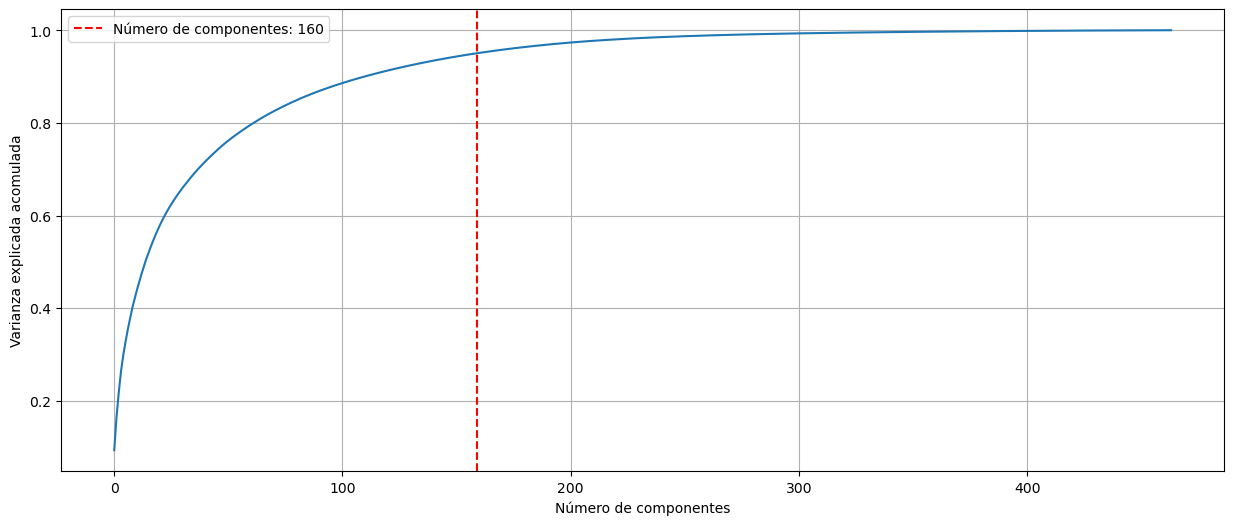

In [7]:
idx_64 = pca_func(data, data_values[x_cols], num_of_col - 2)

Porcentaje de varianza: ['0.09', '0.07', '0.05', '0.05', '0.03', '0.03', '0.03', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00',

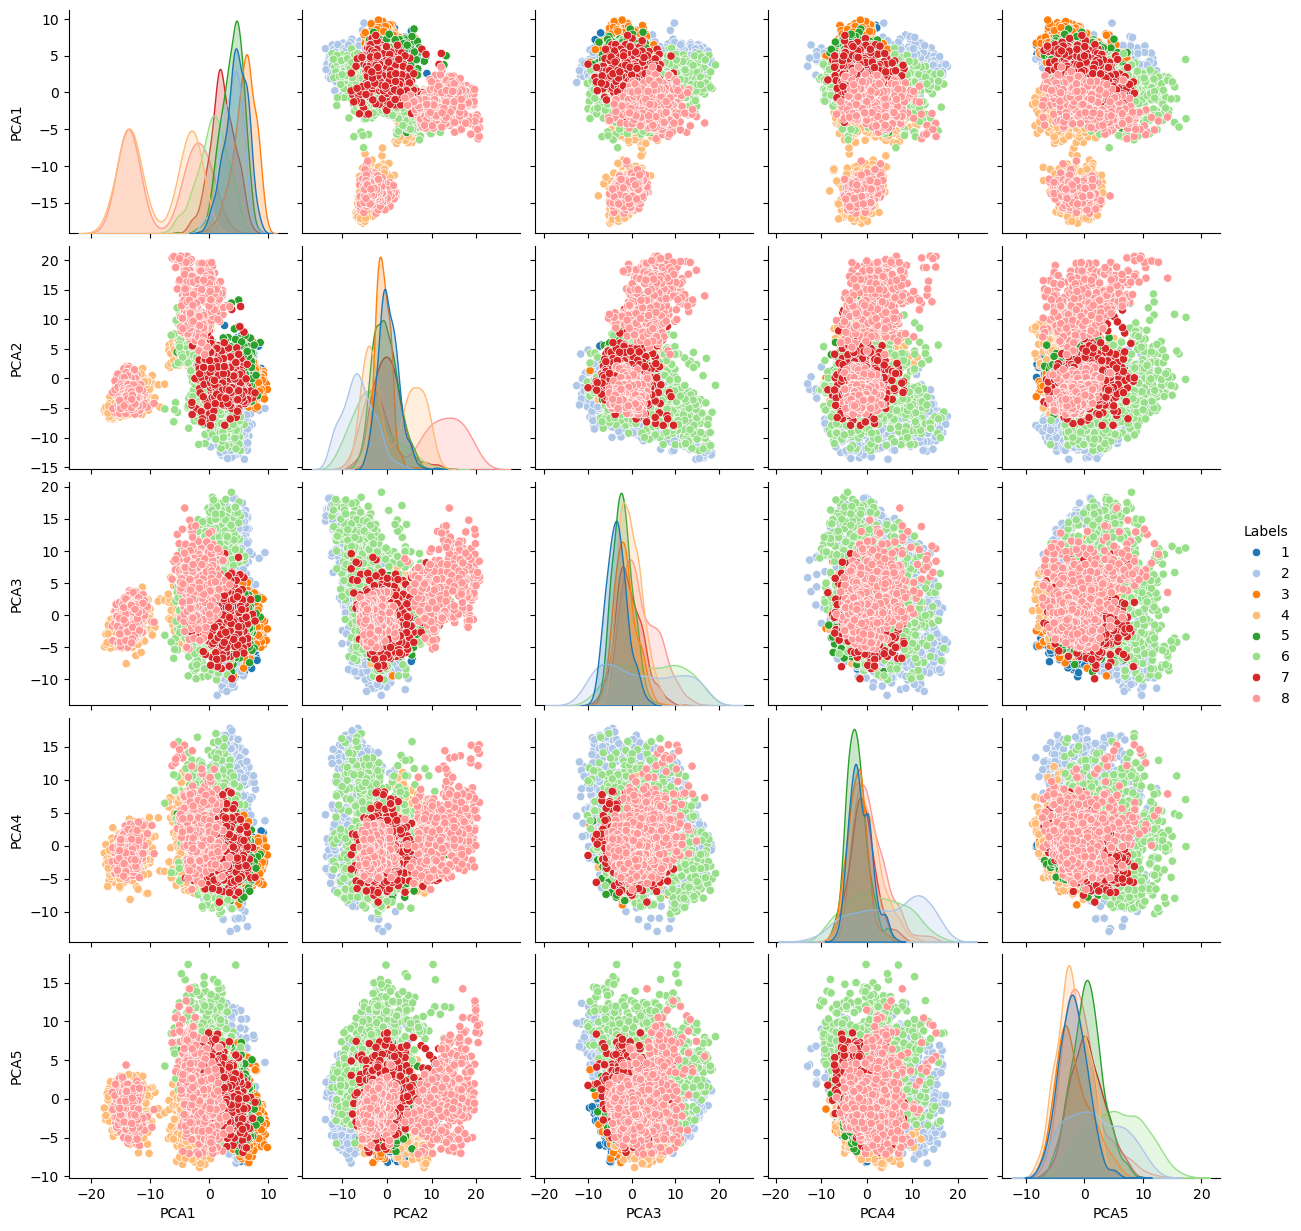

In [8]:
dataFrame_64 = pca_func(data, data_values[x_cols], idx_64)

In [9]:
DF_PATH = "./pca_64.csv"
dataFrame_64.to_csv(DF_PATH)

## Para features_128

In [10]:
data = pd.read_csv("./features_128.csv")

data_values = data.iloc[:, 1:-1]
x_cols = data_values.columns
ss = StandardScaler()
data_values[x_cols] = ss.fit_transform(data_values[x_cols])
num_of_col = data.shape[1]
print(num_of_col)

1746


La cantidad necesaria de componentes reduce un 73.91% la dimensionalidad original


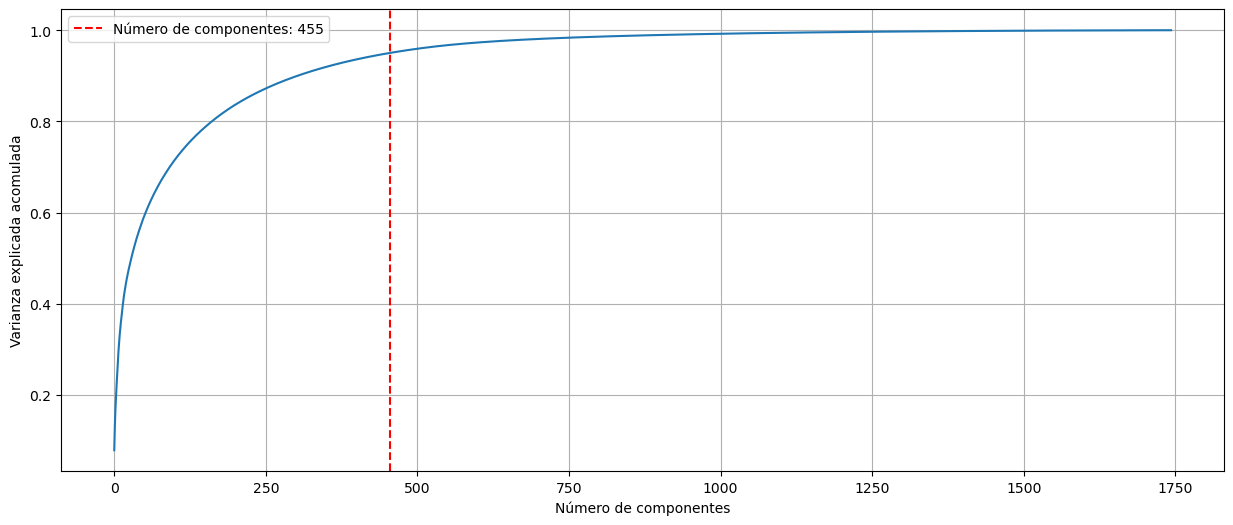

455


In [11]:
idx_128 = pca_func(data, data_values[x_cols], num_of_col - 2)
print(idx_128)

Porcentaje de varianza: ['0.08', '0.05', '0.04', '0.03', '0.03', '0.02', '0.02', '0.02', '0.02', '0.02', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00',

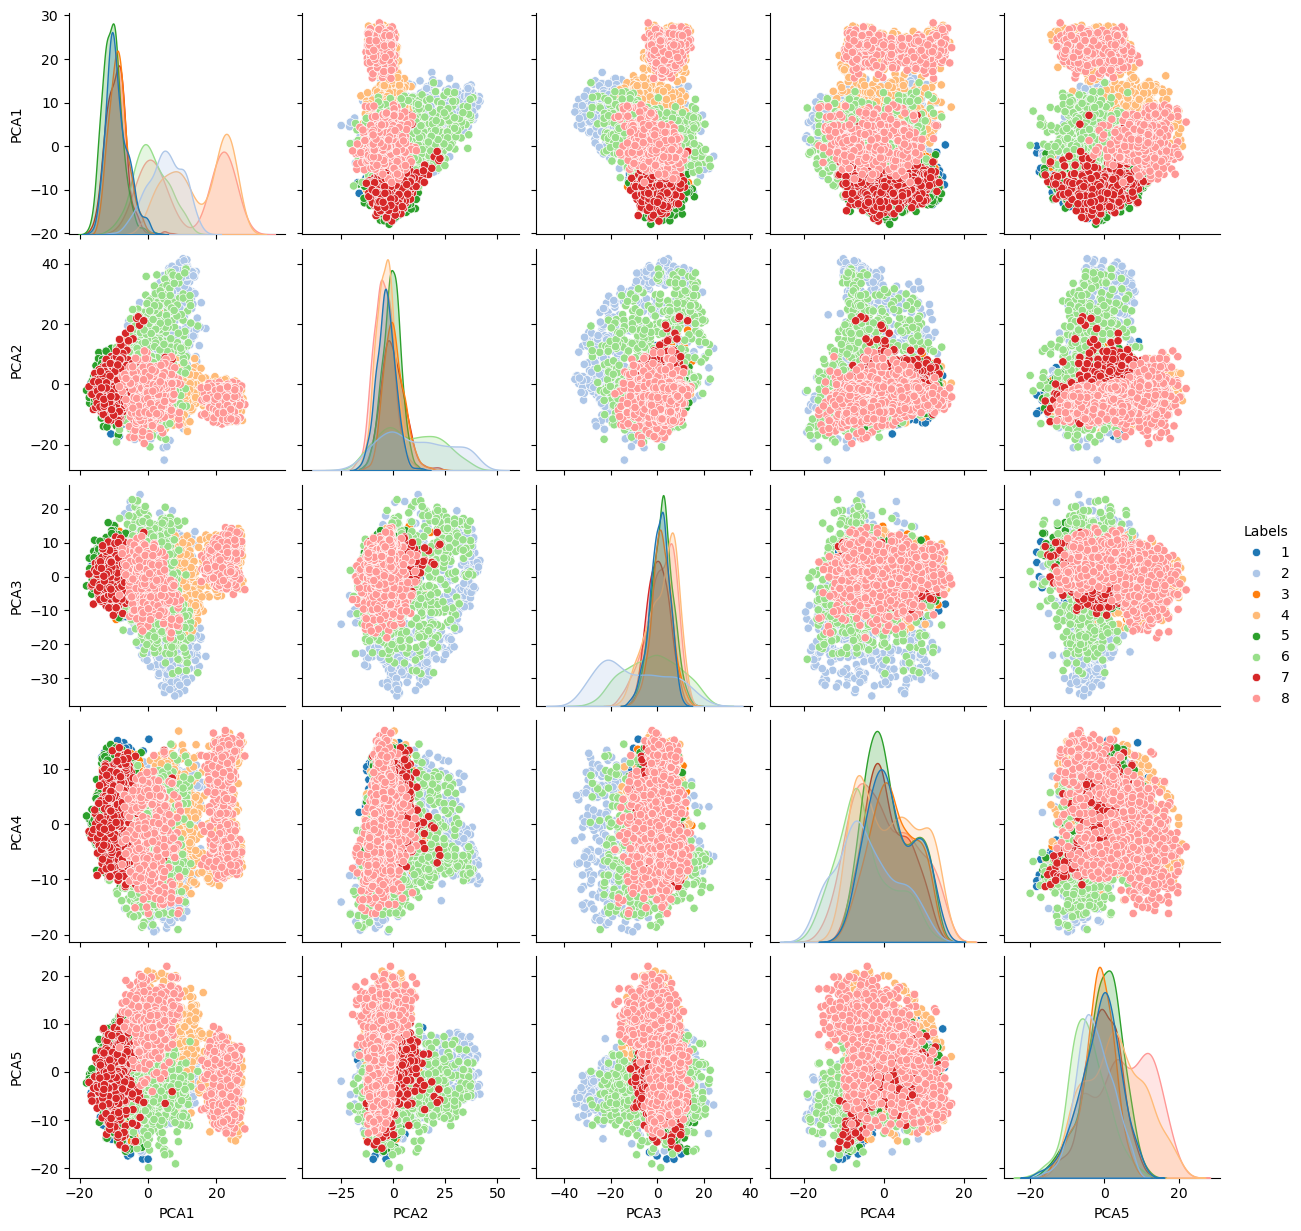

In [12]:
dataFrame_128 = pca_func(data, data_values[x_cols], idx_128)

In [13]:
DF_PATH = "./pca_128.csv"
dataFrame_128.to_csv(DF_PATH)

## Conclusiones

1. Fue posible reducir el número de características al número de componentes que suman un porcentaje de varianza total del 95%. Siendo el número de componentes mayor en la resolución de 128x128, lo que sugiere que a mayores resoluciones, mayor número de componentes son necesarios para sumar un porcentaje de varianza total del 95%.
2. En la extracción de características a las imágenes con una resolución de 64x64, la cantidad necesaria de componentes se reduce un 65.52% de la dimensionalidad original, mientras que, en las que las imágenes que tienen una resolución de 128x128, la cantidad necesaria de componentes se reduce un 73.91% de la dimensionalidad original. Lo que nos da a entender que las características adicionales que se pueden generar en resoluciones más altas no son significativamente útiles para diferenciar las clases.
3. Observamos que, con resoluciones más bajas, algunas clases se distinguen mejor. En nuestro caso, el PCA es más eficaz para imágenes de 64x64 que para las de 128x128, lo que refuerza la idea de que una menor resolución puede facilitar una mejor separación entre clases.